In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from import_data import import_data

sns.set_style('darkgrid')
%matplotlib notebook

In [95]:
data = import_data(dtype='pd')

In [96]:
data_sorted = data.sort_values('GF', ascending=False)
X = data_sorted.columns.values[:-6]

In [117]:
cls = [(1.0, 0.85098039215686272, 0.18431372549019609), 
       (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
       (0.9882352941176471, 0.55294117647058827, 0.3843137254901961),
       (0.55294117647058827, 0.62745098039215685, 0.79607843137254897),
       (0.90588235294117647, 0.54117647058823526, 0.76470588235294112),
       (0.65098039215686276, 0.84705882352941175, 0.32941176470588235)]

<IPython.core.display.Javascript object>


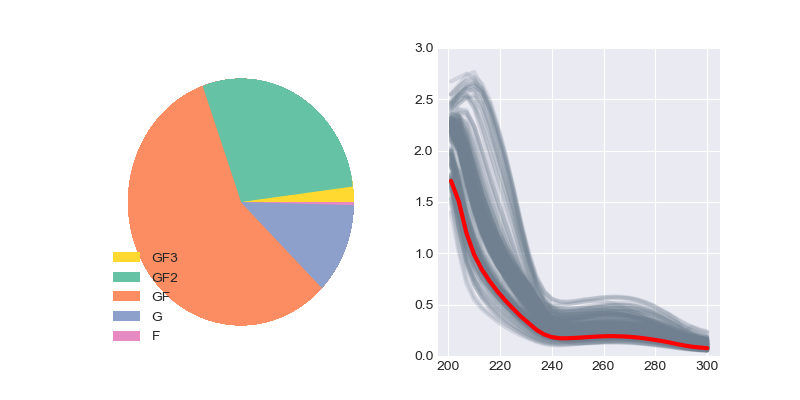

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import matplotlib.animation as animation

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,2)
ax2 = fig.add_subplot(1,2,1)

## set up lineplot for spectra
for j in range(0, data_sorted.shape[0]):
    line, = ax1.plot(X, data_sorted.values[j,:-6], 
                    color='slategrey', 
                    alpha=0.2, 
                    linewidth=3 )    
ax1.set_ylim(0,3)

## set up piechart for cc
pie = ax2.pie(data_sorted.values[0,-6:-1], colors=cls)
ax2.legend(loc=3, labels=data_sorted.columns.values[-6:-1])

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(X))
    #pie.set_ydata(data_sorted.values[0,-6:])
    
    return line, #pie


def animate(i):
    line.set_color('r')
    line.set_alpha(1)
    #line.set_linewidth(4)
    line.set_ydata(data_sorted.values[i,:-6])  # update the data.
    
    ax2.pie(data_sorted.values[i,-6:-1], colors=cls)
    return line, pie


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=189)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [23]:
from IPython.display import HTML
HTML(ani.to_jshtml())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
